In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('cleaned_data.csv')
X=df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [3]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [8]:
predictions = lr.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [10]:
#prediction probabilities comprising of 0 and 1 classes - > 0,1 respectively
pred_prob=lr.predict_proba(X_test)
pred_prob
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve
metrics.roc_auc_score(y_test, pred_prob[:,1])

0.6302043467866831

In [11]:
'''X1=df['EDUCATION'].values.reshape(-1,1)
y1 = df['default payment next month'].values.reshape(-1,1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
lr.fit(X1_train,y1_train)
predictions1 = lr.predict(X1_test)
metrics.roc_auc_score(y1_test, predictions1)'''

"X1=df['EDUCATION'].values.reshape(-1,1)\ny1 = df['default payment next month'].values.reshape(-1,1)\nX1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)\nlr.fit(X1_train,y1_train)\npredictions1 = lr.predict(X1_test)\nmetrics.roc_auc_score(y1_test, predictions1)"

_________________________________________________________________________
**Now, plot the ROC curve.**


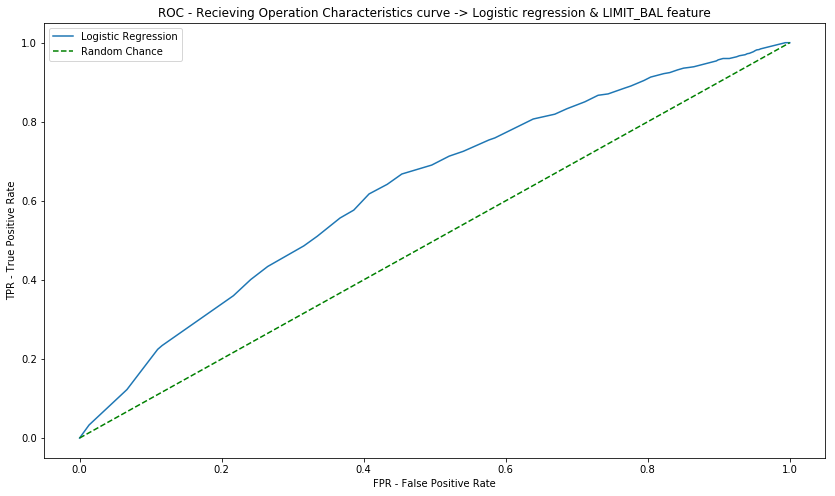

In [14]:
import matplotlib.pyplot as plt
fpr,tpr,thres=roc_curve(y_test,pred_prob[:,1])
plt.figure(figsize=(14,8))
plt.plot(fpr,tpr,"-")
plt.plot([0,1],[0,1],'g--')

plt.xlabel('FPR - False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title('ROC - Recieving Operation Characteristics curve -> Logistic regression & LIMIT_BAL feature')
plt.legend(['Logistic Regression','Random Chance'])

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [16]:
from sklearn.metrics import precision_recall_curve,precision_score,precision_recall_fscore_support
precision,recall,thresh1=precision_recall_curve(y_test,pred_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5,1,'Precision and recall Curve - >  logistic regression & LIMIT_BAL')

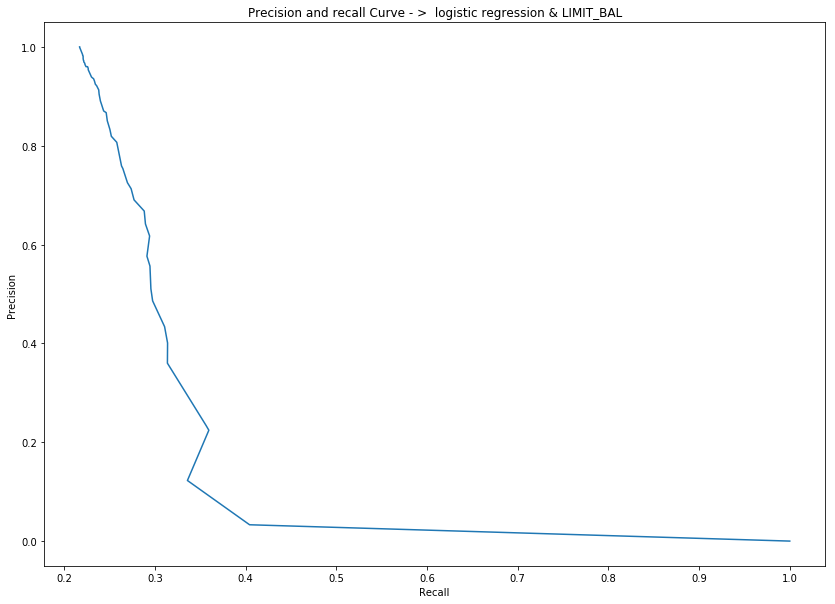

In [17]:
plt.figure(figsize=(14,10))
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall Curve - >  logistic regression & LIMIT_BAL')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [18]:
area = auc(recall, precision)
area

0.31275283839480245

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [21]:

#For Training Data :
xtrain_pred=lr.predict(X_train)
xtrain_pred_proba=lr.predict_proba(X_train)
xtrain_pred_proba                #Prediction Probablities for classes 0,1 Respectively

array([[0.51690065, 0.48309935],
       [0.85300133, 0.14699867],
       [0.77158992, 0.22841008],
       ...,
       [0.92889764, 0.07110236],
       [0.90306345, 0.09693655],
       [0.53376273, 0.46623727]])

In [22]:
roc_auc_score(y_train,xtrain_pred_proba[:,1])

0.6158375447898838

    How is this different, conceptually and quantitatively, from your earlier calculation?
